In [1]:
from pandas import Series, DataFrame
import pandas as pd
import numpy as np
import os
import matplotlib.pylab as plt
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression
import sklearn.metrics

In [30]:
auto_data = pd.read_csv("Auto.csv")
# verifying data inside each column.
auto_data.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
year              int64
origin            int64
name             object
dtype: object

In [31]:
# horsepower is of type object. It should have been integer. Most likely, there's a string value/ missing data 
# in one of the rows and caused all the data to be converted to type object. 
# We will replace all non-integer data with the value 124.

In [32]:
for row_num, col_name in auto_data.horsepower.iteritems():
    if col_name.isdigit() == False:
        auto_data.horsepower[row_num] = 124

C:\Users\Sandesh\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [36]:
# convert all the values in horsepower column to numpy.int64
auto_data.horsepower = auto_data.horsepower.astype(np.int64)

In [37]:
auto_data.horsepower.dtypes

dtype('int64')

In [38]:
# find the correlation coefficient between variables

In [39]:
auto_data.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.776260,-0.804443,-0.765680,-0.831739,0.422297,0.581469,0.563698
cylinders,-0.776260,1.000000,0.950920,0.834350,0.897017,-0.504061,-0.346717,-0.564972
displacement,-0.804443,0.950920,1.000000,0.888133,0.933104,-0.544162,-0.369804,-0.610664
horsepower,-0.765680,0.834350,0.888133,1.000000,0.854827,-0.683294,-0.410250,-0.454624
weight,-0.831739,0.897017,0.933104,0.854827,1.000000,-0.419502,-0.307900,-0.581265
acceleration,0.422297,-0.504061,-0.544162,-0.683294,-0.419502,1.000000,0.282901,0.210084
year,0.581469,-0.346717,-0.369804,-0.410250,-0.307900,0.282901,1.000000,0.184314
origin,0.563698,-0.564972,-0.610664,-0.454624,-0.581265,0.210084,0.184314,1.000000


In [40]:
# cylinders, displacement, and weight all have very high correlation.
# we will exclude them from dataframe

In [42]:
#auto_data.drop('displacement', axis=1, inplace=True)
#del auto_data['weight']
auto_data.dtypes

mpg             float64
cylinders         int64
horsepower        int64
acceleration    float64
year              int64
origin            int64
name             object
dtype: object

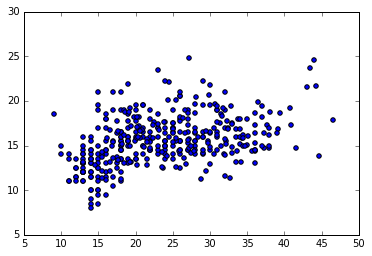

In [45]:
plt.scatter(auto_data.mpg, auto_data.acceleration)
#%matplotlib inline
plt.show()

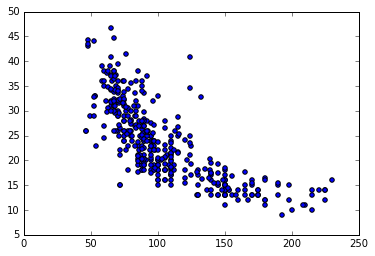

In [53]:
plt.cla()
plt.scatter(auto_data.horsepower, auto_data.mpg)

In [ ]:
# mpg decreases as horsepower increases.

In [47]:
# plot a boxplot

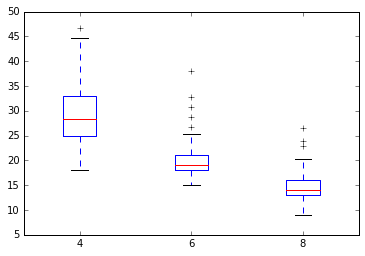

In [50]:
plt.cla()
plt.boxplot( [ [ auto_data.mpg[auto_data.cylinders == 4]],
               [auto_data.mpg[auto_data.cylinders == 6]], 
               [auto_data.mpg[auto_data.cylinders == 8]] ],
               labels = ('4', '6', '8'))
plt.show()

In [51]:
# As the number of cylinders increases, the mpg decreases.

In [59]:
# Split dataset into training and test set. Performing 70-30 split for training-testing set.

In [60]:
# Predictor contains all predictor variables
predictors = auto_data[ ['cylinders', 'horsepower', 'acceleration', 'year']]
targets = auto_data.mpg

In [61]:
pred_train, pred_test, tar_train, tar_test = train_test_split(predictors, targets, test_size = .3)

In [64]:
print "Predictor training set dimension:",pred_train.shape
print "Predictor testing set dimension",pred_test.shape
print "Target training set dimension",tar_train.shape
print "Target testing set dimension",tar_test.shape

Predictor training set dimension: (277, 4)
Predictor testing set dimension (120, 4)
Target training set dimension (277L,)
Target testing set dimension (120L,)


In [65]:
# Build a model on training data
model = LinearRegression()
model.fit(pred_train, tar_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [66]:
# Save and load the model
import pickle
# lm_string as all the information about the model
lm_string = pickle.dumps(model)

In [67]:
model = pickle.loads(lm_string)

In [68]:
# testing on testing set

In [69]:
predictions = model.predict(pred_test)
predictions

array([ 23.58395637,  23.77032408,  26.15956472,  20.53352859,
        28.06066081,  30.75230758,  27.36739706,  13.50576769,
        28.31700745,  19.07767513,  29.94763412,  28.74620046,
        19.5974253 ,  30.8056097 ,  17.53541115,  31.3132923 ,
        24.87133857,  18.58099145,  22.43712448,  27.59917758,
        31.40135867,  24.00541944,  24.34946472,  31.58213435,
        25.60579101,  29.4242554 ,  25.10643393,  23.48249956,
        19.46395513,  19.5183259 ,  20.81840601,  20.37630148,
        10.16125345,  30.18831313,  26.75496019,  30.64231163,
        20.17428875,  28.27120428,  28.36074703,  19.78135646,
        22.21639712,  27.31494998,  21.49251054,  20.69180174,
        30.57627473,  28.08835078,  23.33989991,  19.80859598,
        24.21179304,  13.55282212,  26.21932815,   7.33013926,
        15.95372573,  10.63711891,  29.59585052,  14.99474379,
        27.6543523 ,  31.13981035,  22.19494061,  14.67924353,
        13.83584118,  17.19967716,  30.54963079,  25.37

In [77]:
print "R-Squared, Co-efficient of determination ",model.score(pred_test, tar_test)
sklearn.metrics.r2_score(tar_test, predictions)

R-Squared, Co-efficient of determination  0.732713426684


0.73271342668401607

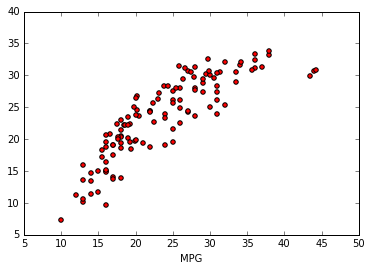

In [74]:
plt.cla()
plt.scatter(tar_test, predictions, c = 'r')
plt.xlabel('MPG')

In [76]:
# Predict mpg for a new value: The list element represents 'cylinders', 'horsepower', 'acceleration', 'year'
print model.predict( [4, 71, 16.5, 75])


[ 27.59917758]


C:\Users\Sandesh\Anaconda2\lib\site-packages\sklearn\utils\validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
